In [2]:
library(tidyverse)
library(repr)
library(readxl)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Introduction

Car accidents have been among the leading causes of injuries and deaths around the world, leading all causes of preventable deaths globally in 2019 at nearly 1.3 million. (“International Overview,” n.d.). Furthermore, according to Transport Canada, environmental factors have consistently made up around or over 20% of all causes of car accidents in the country from 2015 to 2019 (Transport Canada, 2021). This project aims to investigate the relationship between the time of year and the occurrence of car accidents in Vancouver.

Taken from the Vancouver Police Department website, our dataset originally includes all crimes that occurred in the West Point Grey neighbourhood from 2003 to 2022 with relevant information recorded in separate variable columns (the headers of each column are shown in the parentheses):
- Type of crime (TYPE)
- Year of occurrence (YEAR)
- Month of occurrence (MONTH)
- Day of occurrence (DAY)
- Hour of occurrence (HOUR)
- Minute of occurrence (MINUTE)
- Hundred block of location (HUNDRED_BLOCK)
- Neighbourhood of location (NEIGHBOURHOOD)
- X-coordinate of location (X)
- Y-coordinate of location (Y)
Of all crimes, our crime types of interest are “Vehicle Collision or Pedestrian Struck (with Fatality)” and “Vehicle Collision or Pedestrian Struck (with Injury)”. The rest of the crimes will be filtered out.

Our inferential question will be to estimate the difference in proportions and standard deviations of car accidents that happen in the summer (which we classify as April to September) and the winter (which we classify as October to March) in Vancouver from 2003 to 2022, using the West Point Grey neighbourhood as a sample. 



In [7]:
crimes <- read_csv("https://raw.githubusercontent.com/bernie-leung/STAT-201-group20newrepo/main/crimedata_csv_West%20Point%20Grey_AllYears.csv?token=GHSAT0AAAAAABWZIEUMCDZNWHJBZOIGRVVYYW4QFGA")
head(crimes)

Rows: 9247 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2022,6,5,10,0,13XX DISCOVERY ST,West Point Grey,485246.9,5458027
Break and Enter Commercial,2004,6,30,0,1,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,5,9,15,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,8,22,20,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,11,1,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2011,3,31,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013


In [8]:
collisions <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    mutate(MONTH = as_factor(MONTH))
    
head(collisions)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Vehicle Collision or Pedestrian Struck (with Fatality),2017,8,6,9,18,42XX BLOCK W 4TH AVE,West Point Grey,485442,5457333
Vehicle Collision or Pedestrian Struck (with Fatality),2021,10,10,23,25,42XX NAUTILUS CLS,West Point Grey,485300,5457357
Vehicle Collision or Pedestrian Struck (with Fatality),2007,11,20,1,44,42XX W 4TH AVE,West Point Grey,485442,5457333
Vehicle Collision or Pedestrian Struck (with Fatality),2020,9,28,17,9,W 10TH AVE / SASAMAT ST,West Point Grey,484785,5456806
Vehicle Collision or Pedestrian Struck (with Fatality),2019,5,23,14,22,W 4TH AVE / BLANCA ST,West Point Grey,484359,5457394
Vehicle Collision or Pedestrian Struck (with Fatality),2003,3,20,19,29,W 4TH AVE / HIGHBURY ST,West Point Grey,486350,5457336


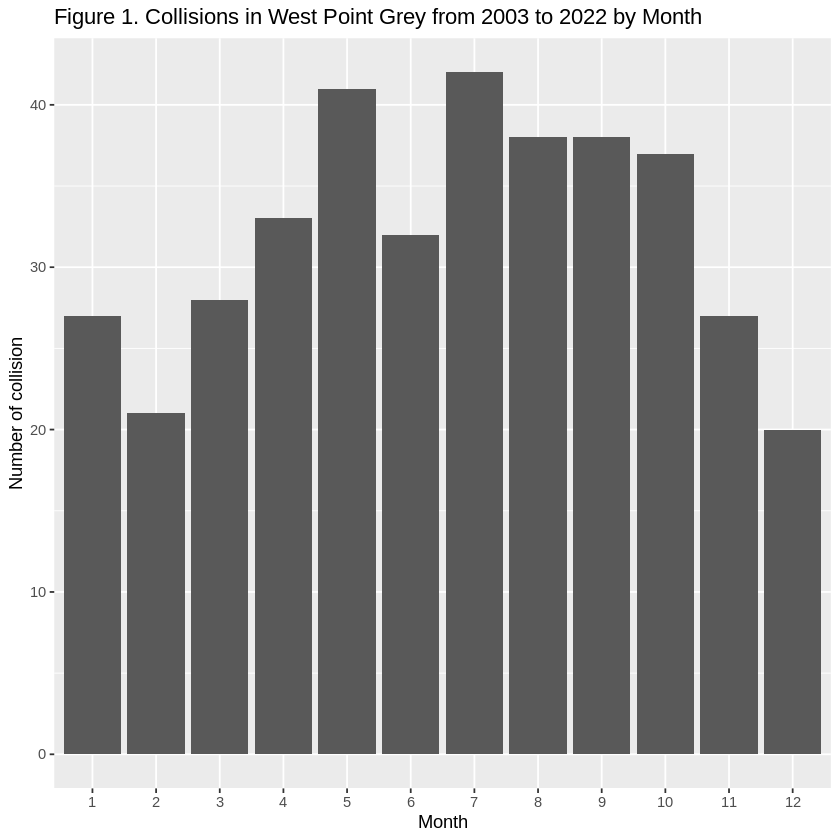

In [9]:
collisions_by_month <- collisions %>%
    group_by(MONTH) %>%
    summarise(count = sum(MONTH == MONTH))


collisions_graph <- collisions_by_month %>%
    ggplot(aes(x = MONTH, y = count)) +
    geom_bar(stat = "Identity") +
    labs(x = "Month", y = "Number of collision") +
    ggtitle("Figure 1. Collisions in West Point Grey from 2003 to 2022 by Month")

collisions_graph

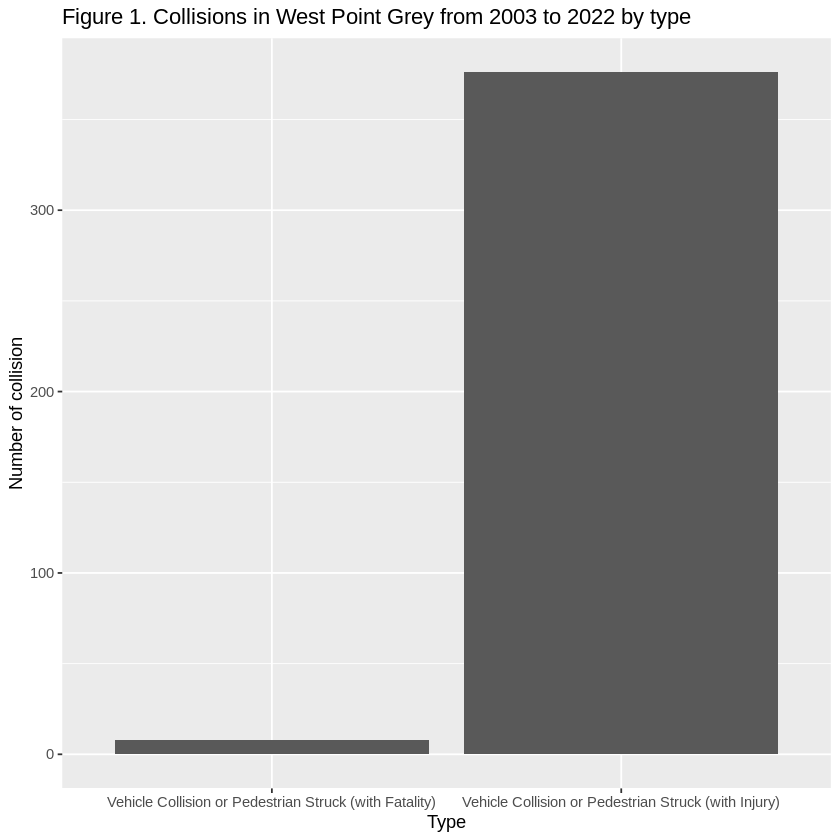

In [10]:
collisions_by_type <- collisions %>%
    group_by(TYPE) %>%
    summarise(count = sum(TYPE == TYPE))


collisions_graph <- collisions_by_type %>%
    ggplot(aes(x = TYPE, y = count)) +
    geom_bar(stat = "Identity") +
    labs(x = "Type", y = "Number of collision") +
    ggtitle("Figure 1. Collisions in West Point Grey from 2003 to 2022 by type")

collisions_graph

## Preliminary Results

In [11]:
## draw a sample from the population to calculate the point estimate: sample proportion
set.seed(11)
sample_prop_summer <- crimes %>%
    filter(MONTH == 4| MONTH == 5| MONTH == 6| MONTH == 7| MONTH == 8| MONTH == 9) %>%
    rep_sample_n(size = 1000) %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    nrow()/1000

sample_prop_summer

[1] 0.047

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during summer.

In [12]:
set.seed(12)
sample_prop_winter <- crimes %>%
    filter(MONTH == 10| MONTH == 11| MONTH == 12| MONTH == 1| MONTH == 2| MONTH == 3) %>%
    rep_sample_n(size = 1000) %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    nrow()/1000

sample_prop_winter

[1] 0.032

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during winter.

In [13]:
diff_sample_props <- sample_prop_summer - sample_prop_winter
diff_sample_props

[1] 0.015

0.015 is the difference of the sample proportions between summer and winter.

In [14]:
## create a table to present the sample proportions

tab_prop <- matrix(c(0.047, 0.032, 0.015), ncol=3, byrow=TRUE)
colnames(tab_prop) <- c("sample prop of summer", "sample prop of winter", "difference in props")
rownames(tab_prop) <- c("proportion")
tab_prop <- as.table(tab_prop)
tab_prop


           sample prop of summer sample prop of winter difference in props
proportion                 0.047                 0.032               0.015

This table shows the sample proportions in summer and winter and their difference.